In [1]:
import sympy
import numpy
import scipy
import matplotlib.pyplot as plt

import datetime

import math

import pandas

import control

import scipy.optimize
from tbcontrol.responses import fopdt, sopdt
from ipywidgets import interact

import tclab

TCLab = tclab.setup(connected= True) #False, speedup=100)

Specifications

In [2]:
spans = 11
base_unit = 60*30 #Each span lasts base_unit seconds

q_init = 0
q_final = 100

setpoint = 30

In [3]:
increment = (q_final-q_init)/(spans-1)

run_time = base_unit*spans

In [4]:
str(datetime.timedelta(seconds=run_time)), increment

('5:30:00', 10.0)

with TCLab() as lab:
    h = tclab.Historian(lab.sources)
    tcplot = tclab.Plotter(h, run_time)
    q_test = q_init
    
    base_unit_checker = 1
    
    for t in tclab.clock(run_time):
        
        base_unit_counter = t/base_unit
        
        print(base_unit_counter, base_unit_checker, t)
        
        if base_unit_counter == base_unit_checker:
            
            base_unit_checker = base_unit_counter+1
            q_test += increment
        lab.Q1(q_test)
        tcplot.update(t)

h.get_sessions()

h.load_session(1)

data = {"Time" : h.t, "T1" : h.logdict['T1'], "T2" : h.logdict['T2'], "Q1" : h.logdict['Q1'], "Q2" : h.logdict['Q2']}

In [5]:
data_frame = pandas.read_csv("long_span_run 20200226 overnight")

In [6]:
class historian:
    
    def __init__(self, dataframe):
        self.dataframe = dataframe
        
        self.t = self.dataframe.Time
    
    def logdict(self, string):
        return self.dataframe[string]

In [7]:
h = historian(data_frame)

In [8]:
[K, tau, theta, y0], _ = scipy.optimize.curve_fit(fopdt, h.t, h.logdict('T1'), [2, 4, 100, 50]) #h.logdict['T1']
[K, tau, theta, y0]

[729.7131969989221, 67241.92513216253, -65644.55849861495, -435.76236531568196]

In [9]:
# plt.plot(h.t, h.logdict('T1'))

for span in range(spans):
    plt.figure()
    
    lower = span*base_unit
    upper = (span+1)*base_unit
    
    [K, tau, theta, y0], _ = scipy.optimize.curve_fit(fopdt, numpy.array(h.t[lower:upper])-h.t[lower], h.logdict('T1')[lower:upper], [2, 4, 100, 50])

    print([K, tau, theta, y0])
#     print( fopdt(numpy.array(h.t[lower:upper])-h.t[lower], K, tau, theta, y0))
    
#     plt.plot(h.t[lower:upper], h.logdict('T1')[lower:upper], 'o')
#     plt.plot(h.t[lower:upper], fopdt(numpy.array(h.t[lower:upper])-h.t[lower], K, tau, theta, y0))

[-0.7176560758756356, 2053.853786128415, -73.18866285610108, 22.808641449545124]
[7.937039293784351, 178.12547158437934, 21.036608803970914, 22.461818209595204]
[7.1536906324730705, 165.1448014291556, 20.926050477221434, 30.524285724070324]
[6.563112964813911, 149.81063296072156, 20.61981901347487, 37.68428564746316]
[6.506009951709675, 148.81426436927867, 20.3072471873931, 44.27761894615264]
[6.189974932654428, 141.02997469036322, 18.47722983838304, 50.795789460405004]
[6.413889462851305, 135.75806087229026, 23.42268878301546, 57.25958333680524]
[6.064173166391529, 135.39259360058972, 25.6235714302216, 63.85615394006349]
[5.727977588148545, 127.65326994342529, 25.390739043099863, 69.86076928329975]
[5.83587135055858, 194.00614209076102, 0.998937082346969, 75.69993886384873]
[5.052179674483506, 111.0114012113139, 26.346227181074287, 81.70148148521349]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [10]:
time_span = []
t_values = []

for span in range(1,spans):
    
    lower = span*base_unit
    upper = (span+1)*base_unit
    
    time_span += list(h.t[0:base_unit].values)
    
    t_normalised = list(h.logdict('T1')[lower:upper].values - h.logdict('T1')[lower])
    
    t_values += (t_normalised)

In [11]:
[K_all, tau_all, theta_all, y0_all], _ = scipy.optimize.curve_fit(fopdt, time_span, t_values, [2, 4, 100, 50])
[K_all, tau_all, theta_all, y0_all]

[6.366643864452244,
 149.1166774880479,
 19.344789860059908,
 -0.008549964066780795]

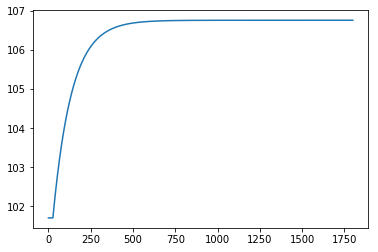

In [12]:
plt.plot(h.t[0:base_unit], fopdt(h.t[0:base_unit], K, tau, theta, y0)+20)

[7.937039293784351, 178.12547158437934, 21.036608803970914, 22.461818209595204]
[7.1536906324730705, 165.1448014291556, 20.926050477221434, 30.524285724070324]
[6.563112964813911, 149.81063296072156, 20.61981901347487, 37.68428564746316]
[6.506009951709675, 148.81426436927867, 20.3072471873931, 44.27761894615264]
[6.189974932654428, 141.02997469036322, 18.47722983838304, 50.795789460405004]
[6.413889462851305, 135.75806087229026, 23.42268878301546, 57.25958333680524]
[6.064173166391529, 135.39259360058972, 25.6235714302216, 63.85615394006349]
[5.727977588148545, 127.65326994342529, 25.390739043099863, 69.86076928329975]
[5.83587135055858, 194.00614209076102, 0.998937082346969, 75.69993886384873]
[5.052179674483506, 111.0114012113139, 26.346227181074287, 81.70148148521349]


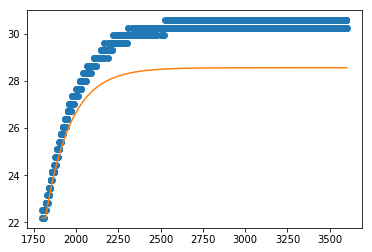

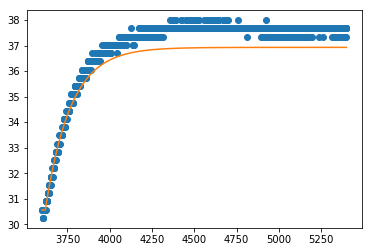

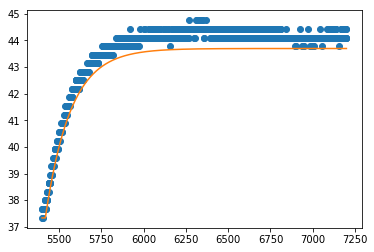

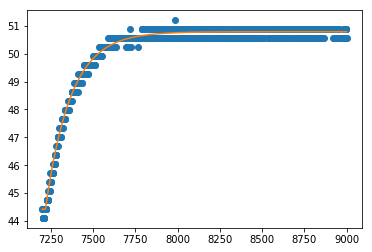

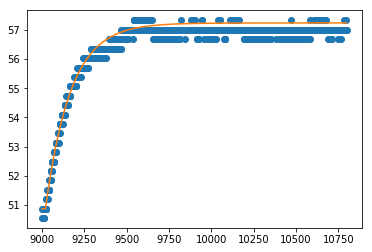

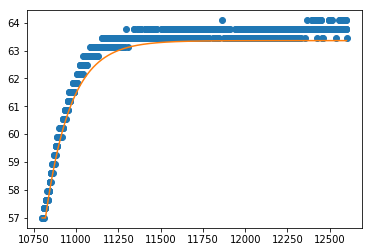

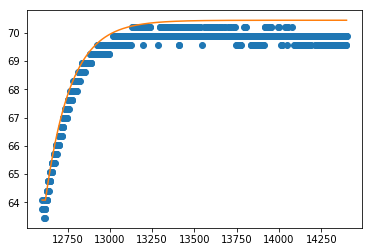

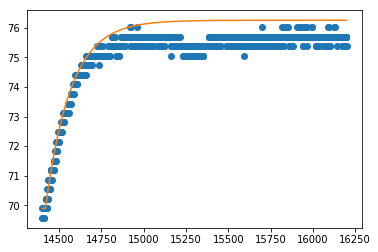

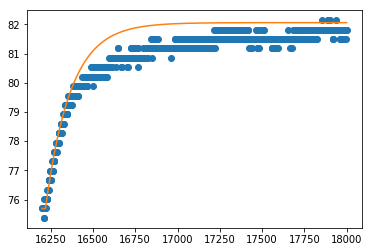

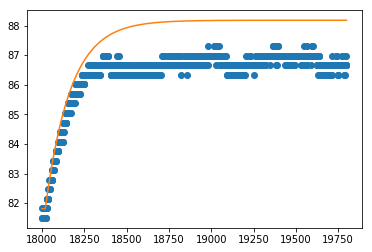

In [13]:
for span in range(1,spans):
    plt.figure()
    
    lower = span*base_unit
    upper = (span+1)*base_unit
    
    [K, tau, theta, y0], _ = scipy.optimize.curve_fit(fopdt, numpy.array(h.t[lower:upper])-h.t[lower], h.logdict('T1')[lower:upper], [2, 4, 100, 50])

    print([K, tau, theta, y0])
#     print( fopdt(numpy.array(h.t[lower:upper])-h.t[lower], K, tau, theta, y0))
    
    plt.plot(h.t[lower:upper], h.logdict('T1')[lower:upper], 'o')
    plt.plot(h.t[lower:upper], fopdt(numpy.array(h.t[lower:upper])-h.t[lower], K_all, tau_all, theta_all, y0_all)+h.logdict('T1')[lower])

In [14]:
K = 0
tau = 0
theta = 0
y0 = 0
for i in ([7.937039293784351, 178.12547158437934, 21.036608803970914, 22.461818209595204],
            [7.1536906324730705, 165.1448014291556, 20.926050477221434, 30.524285724070324],
            [6.563112964813911, 149.81063296072156, 20.61981901347487, 37.68428564746316],
            [6.506009951709675, 148.81426436927867, 20.3072471873931, 44.27761894615264],
            [6.189974932654428, 141.02997469036322, 18.47722983838304, 50.795789460405004],
            [6.413889462851305, 135.75806087229026, 23.42268878301546, 57.25958333680524],
            [6.064173166391529, 135.39259360058972, 25.6235714302216, 63.85615394006349],
            [5.727977588148545, 127.65326994342529, 25.390739043099863, 69.86076928329975],
            [5.83587135055858, 194.00614209076102, 0.998937082346969, 75.69993886384873],
            [5.052179674483506, 111.0114012113139, 26.346227181074287, 81.70148148521349]):
    K += i[0]
    tau += i[1]
    theta += i[2]
    y0 += i[3]
    
K = K/10
tau = tau/10
theta = theta/10
y0 = y0/10

# K, tau, theta, y0

6.34439190178689, 148.67466127522783, 20.314911884020155, 53.412172489691706

In [49]:
K = 6.34439190178689
tau = 148.67466127522783
theta = 20.314911884020155
y0 = 53.412172489691706

In [16]:
theta/tau

0.13664004148234118

Lag dominant model as theta/tau < 1. Tau is too large so sluggish response to any disturbance but provides satisfactory set-point responses.

# **Integral error criteria**

In [25]:
import numpy
import tbcontrol
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
from tbcontrol import blocksim

In [48]:
# from IPython.display import Image
# Image(filename='IAE_Tuning_Rules.png')
def ISEPI(td,τ,gp): #deadtiime,tau,gain
    A,B,C,D,E,F = 1.305,-0.959,0.492,0.739,0,0
    Kc,Ti,Td = A*(td/τ)**B/gp,τ/C*(td/τ)**D,τ*E*(td/τ)**F
    return[Kc,Ti,Td]

def ISEPID(td,τ,gp):
    A,B,C,D,E,F = 1.495,-0.945,1.101,0.771,0.56,1.006
    Kc,Ti,Td = A*(td/τ)**B/gp,τ/C*(td/τ)**D,τ*E*(td/τ)**F
    return[Kc,Ti,Td]

def IAEPI(td,τ,gp):
    A,B,C,D,E,F = 0.984,-0.986,0.608,0.707,0,0
    Kc,Ti,Td = A*(td/τ)**B/gp,τ/C*(td/τ)**D,τ*E*(td/τ)**F
    return[Kc,Ti,Td]

def IAEPID(td,τ,gp):
    A,B,C,D,E,F = 1.435,-0.921,0.878,0.749,0.482,1.137
    Kc,Ti,Td = A*(td/τ)**B/gp,τ/C*(td/τ)**D,τ*E*(td/τ)**F
    return[Kc,Ti,Td]

def ITAEPI(td,τ,gp):
    A,B,C,D,E,F = 0.859,-0.977,0.674,0.68,0,0
    Kc,Ti,Td = A*(td/τ)**B/gp,τ/C*(td/τ)**D,τ*E*(td/τ)**F
    return[Kc,Ti,Td]

def ITAEPID(td,τ,gp):
    A,B,C,D,E,F = 1.357,-0.947,0.842,0.738,0.381,0.995
    Kc,Ti,Td = A*(td/τ)**B/gp,τ/C*(td/τ)**D,τ*E*(td/τ)**F
    return[Kc,Ti,Td]

In [123]:
Gp = blocksim.LTI('Gp', 'u', 'y', 6.344, [148.675, 1], 20.315)

In [62]:
Kc,taui,_ = ISEPI(theta,tau,K)
Gc_isepi = blocksim.PI('Gc', 'e', 'u', Kc,taui)

diagram1 = blocksim.Diagram([Gp, Gc_isepi], 
                           sums={'e': ('+ysp', '-y')}, 
                           inputs={'ysp': blocksim.step()})

In [63]:
Kc,taui,_ = IAEPI(theta,tau,K)
Gc_iaepi = blocksim.PI('Gc', 'e', 'u', Kc,taui)

diagram2 = blocksim.Diagram([Gp, Gc_iaepi], 
                           sums={'e': ('+ysp', '-y')}, 
                           inputs={'ysp': blocksim.step()})

In [64]:
Kc,taui,_ = ITAEPI(theta,tau,K)
Gc_itaepi = blocksim.PI('Gc', 'e', 'u', Kc,taui)

diagram3 = blocksim.Diagram([Gp, Gc_itaepi], 
                           sums={'e': ('+ysp', '-y')}, 
                           inputs={'ysp': blocksim.step()})

In [65]:
Kc,taui,taud = ISEPID(theta,tau,K)
Gc_isepid = blocksim.PID('Gc', 'e', 'u', Kc,taui,taud)

diagram4 = blocksim.Diagram([Gp, Gc_isepid], 
                           sums={'e': ('+ysp', '-y')}, 
                           inputs={'ysp': blocksim.step()})

In [66]:
Kc,taui,taud = IAEPID(theta,tau,K)
Gc_iaepid = blocksim.PID('Gc', 'e', 'u', Kc,taui,taud)

diagram5 = blocksim.Diagram([Gp, Gc_iaepid], 
                           sums={'e': ('+ysp', '-y')}, 
                           inputs={'ysp': blocksim.step()})

In [67]:
Kc,taui,taud = ITAEPID(theta,tau,K)
Gc_itaepid = blocksim.PID('Gc', 'e', 'u', Kc,taui,taud)

diagram6 = blocksim.Diagram([Gp, Gc_itaepid], 
                           sums={'e': ('+ysp', '-y')}, 
                           inputs={'ysp': blocksim.step()})

In [68]:
ts = numpy.arange(start=0, stop=1000, step=1)

In [69]:
sim1 = diagram1.simulate(ts, progress=True)
sim2 = diagram2.simulate(ts, progress=True)
sim3 = diagram3.simulate(ts, progress=True)
sim4 = diagram4.simulate(ts, progress=True)
sim5 = diagram5.simulate(ts, progress=True)
sim6 = diagram6.simulate(ts, progress=True)

In [70]:
y1 = sim1['y']
y2 = sim2['y']
y3 = sim3['y']
y4 = sim4['y']
y5 = sim5['y']
y6 = sim6['y']

In [112]:
ysp = sim1['ysp']

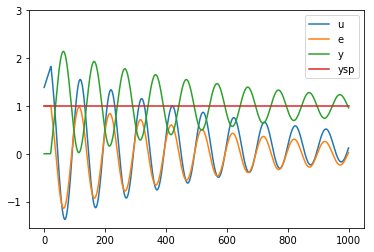

In [83]:
for signal, value in sim1.items():
    plt.plot(ts, value, label=signal)
plt.ylim(top=3)
plt.legend()

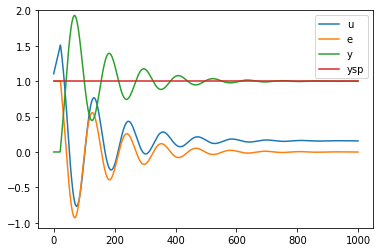

In [84]:
for signal, value in sim2.items():
    plt.plot(ts, value, label=signal)
plt.ylim(top=2)
plt.legend()

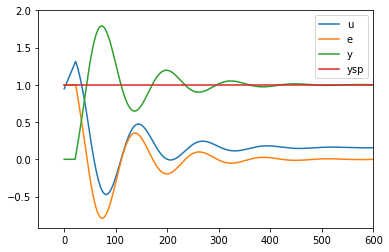

In [94]:
for signal, value in sim3.items():
    plt.plot(ts, value, label=signal)
plt.ylim(top=2)
plt.xlim(right=600)
plt.legend()

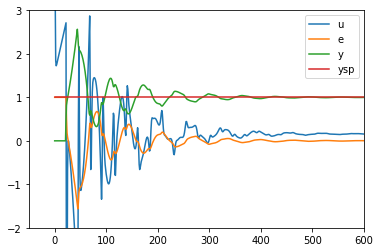

In [95]:
for signal, value in sim4.items():
    plt.plot(ts, value, label=signal)
plt.ylim(top=3)
plt.ylim(bottom=-2)
plt.xlim(right=600)
plt.legend()

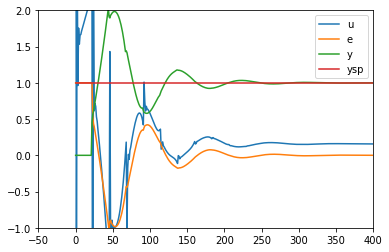

In [96]:
for signal, value in sim5.items():
    plt.plot(ts, value, label=signal)
plt.ylim(top=2)
plt.ylim(bottom=-1)
plt.xlim(right=400)
plt.legend()

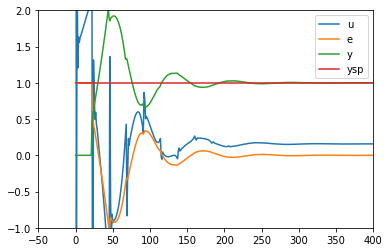

In [97]:
for signal, value in sim6.items():
    plt.plot(ts, value, label=signal)
plt.ylim(top=2)
plt.ylim(bottom=-1)
plt.xlim(right=400)
plt.legend()

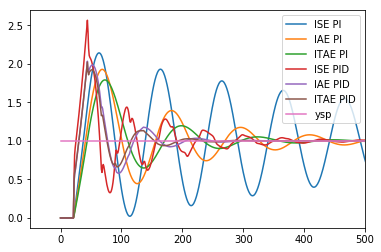

In [113]:
plt.plot(ts, y1, label='ISE PI')
plt.plot(ts, y2, label='IAE PI')
plt.plot(ts, y3, label='ITAE PI')
plt.plot(ts, y4, label='ISE PID')
plt.plot(ts, y5, label='IAE PID')
plt.plot(ts, y6, label='ITAE PID')
plt.plot(ts, ysp, label='ysp')
plt.xlim(right=500)
plt.legend()

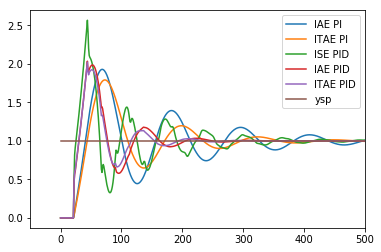

In [114]:
# plt.plot(ts, y1, label='ISE PI')
plt.plot(ts, y2, label='IAE PI')
plt.plot(ts, y3, label='ITAE PI')
plt.plot(ts, y4, label='ISE PID')
plt.plot(ts, y5, label='IAE PID')
plt.plot(ts, y6, label='ITAE PID')
plt.plot(ts, ysp, label='ysp')
plt.xlim(right=500)
plt.legend()

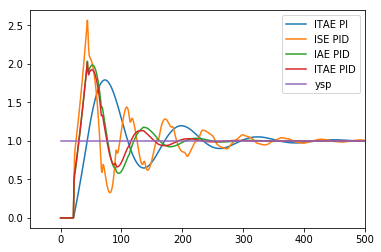

In [115]:
# plt.plot(ts, y1, label='ISE PI')
# plt.plot(ts, y2, label='IAE PI')
plt.plot(ts, y3, label='ITAE PI')
plt.plot(ts, y4, label='ISE PID')
plt.plot(ts, y5, label='IAE PID')
plt.plot(ts, y6, label='ITAE PID')
plt.plot(ts, ysp, label='ysp')
plt.xlim(right=500)
plt.legend()

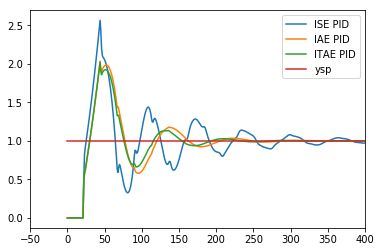

In [119]:
# plt.plot(ts, y1, label='ISE PI')
# plt.plot(ts, y2, label='IAE PI')
# plt.plot(ts, y3, label='ITAE PI')
plt.plot(ts, y4, label='ISE PID')
plt.plot(ts, y5, label='IAE PID')
plt.plot(ts, y6, label='ITAE PID')
plt.plot(ts, ysp, label='ysp')
plt.xlim(right=400)
plt.legend()

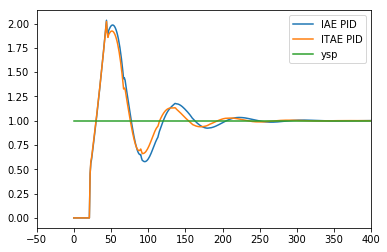

In [118]:
# plt.plot(ts, y1, label='ISE PI')
# plt.plot(ts, y2, label='IAE PI')
# plt.plot(ts, y3, label='ITAE PI')
# plt.plot(ts, y4, label='ISE PID')
plt.plot(ts, y5, label='IAE PID')
plt.plot(ts, y6, label='ITAE PID')
plt.plot(ts, ysp, label='ysp')
plt.xlim(right=400)
plt.legend()

In [122]:
# from IPython.display import Image
# Image(filename='CohenCoonRules1.png')

## **Cohen and coon**

In [121]:
def P(td,τ,gp): #deadtiime,tau,gain
    Kc,Ti,Td = 1.03/K * (τ/td + 0.34), 0, 0
    return[Kc,Ti,Td]
def PI(td,τ,gp): #deadtiime,tau,gain
    Kc,Ti,Td = 0.9/K * (τ/td + 0.092), 3.33*td * (τ+0.092*td)/(τ+2.22*td), 0
    return[Kc,Ti,Td]
def PD(td,τ,gp): #deadtiime,tau,gain
    Kc,Ti,Td = 1.24/K * (τ/td + 0.129), 0, 0.27*td * (τ-0.324*td)/(τ+0.129*td)
    return[Kc,Ti,Td]
def PID(td,τ,gp): #deadtiime,tau,gain
    Kc,Ti,Td = 1.35/K * (τ/td + 0.185), 2.5*td * (τ+0.185*td)/(τ+0.611*td), 0.37*td * (τ)/(τ+0.185*td)
    return[Kc,Ti,Td]

In [124]:
Gp = blocksim.LTI('Gp', 'u', 'y', 6.344, [148.675, 1], 20.315)

In [179]:
#WHAT CAN WE USE TO PLOT THE P-CONTROLLER? SIMPLE GAIN -> LTI?

In [133]:
Kc,taui,_ = PI(theta,tau,K)
Gc_p = blocksim.PI('Gc', 'e', 'u', Kc,taui)

diagram7 = blocksim.Diagram([Gp, Gc_p], 
                           sums={'e': ('+ysp', '-y')}, 
                           inputs={'ysp': blocksim.step()})

In [180]:
#WHAT CAN WE USE TO PLOT THE PD-CONTROLLER?

In [134]:
Kc,taui,taud = PID(theta,tau,K)
Gc_p = blocksim.PID('Gc', 'e', 'u', Kc,taui,taud)

diagram8 = blocksim.Diagram([Gp, Gc_p], 
                           sums={'e': ('+ysp', '-y')}, 
                           inputs={'ysp': blocksim.step()})

In [132]:
ts = numpy.arange(start=0, stop=1000, step=1)

In [136]:
sim7 = diagram7.simulate(ts, progress=True)
sim8 = diagram8.simulate(ts, progress=True)

In [137]:
y7 = sim7['y']
y8 = sim8['y']

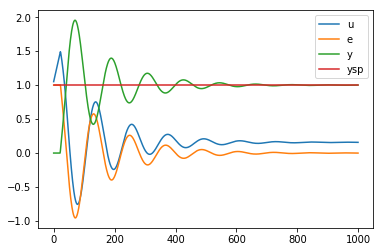

In [138]:
for signal, value in sim7.items():
    plt.plot(ts, value, label=signal)
plt.legend()

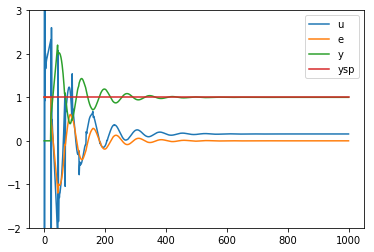

In [141]:
for signal, value in sim8.items():
    plt.plot(ts, value, label=signal)
plt.ylim(top=3)
plt.ylim(bottom=-2)
plt.legend()

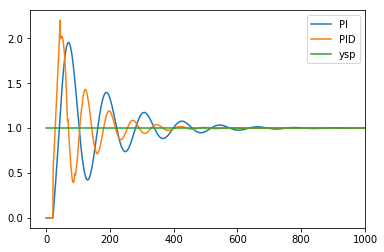

In [142]:
plt.plot(ts, y7, label='PI')
plt.plot(ts, y8, label='PID')
plt.plot(ts, ysp, label='ysp')
plt.xlim(right=1000)
plt.legend()

## **ZN**

For P control: Kc = tau / (gp * td)

For PI control: Kc = 0.9 * tau / (gp * td); Ti = 3.33 * td

For PID control: Kc = 1.2 * tau / (gp * td); Ti = 2 * td; Td = 0.5 * td

In [167]:
def P(td,τ,gp): #deadtiime,tau,gain
    Kc,Ti,Td = τ/(K*td), 0, 0
    return[Kc,Ti,Td]
def PI(td,τ,gp): #deadtiime,tau,gain
    Kc,Ti,Td = 0.9*τ/(K*td), 3.33*td, 0
    return[Kc,Ti,Td]
def PID(td,τ,gp): #deadtiime,tau,gain
    Kc,Ti,Td = 1.2*τ/(K*td), 2*td, 0.5*td
    return[Kc,Ti,Td]

In [168]:
Gp = blocksim.LTI('Gp', 'u', 'y', 6.344, [148.675, 1], 20.315)

In [181]:
#AGAIN WILL WE USE LTI FOR P-CONTROLLER?

In [169]:
Kc,taui,_ = PI(theta,tau,K)
Gc_p = blocksim.PI('Gc', 'e', 'u', Kc,taui)

diagram9 = blocksim.Diagram([Gp, Gc_p], 
                           sums={'e': ('+ysp', '-y')}, 
                           inputs={'ysp': blocksim.step()})

In [170]:
Kc,taui,taud = PID(theta,tau,K)
Gc_p = blocksim.PID('Gc', 'e', 'u', Kc,taui,taud)

diagram10 = blocksim.Diagram([Gp, Gc_p], 
                           sums={'e': ('+ysp', '-y')}, 
                           inputs={'ysp': blocksim.step()})

In [171]:
ts = numpy.arange(start=0, stop=1000, step=1)

In [172]:
sim9 = diagram9.simulate(ts, progress=True)
sim10 = diagram10.simulate(ts, progress=True)

In [173]:
y9 = sim9['y']
y10 = sim10['y']

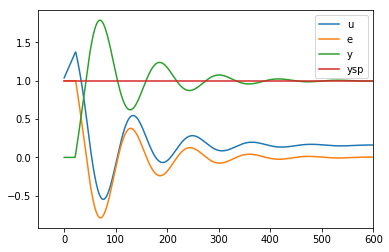

In [176]:
for signal, value in sim9.items():
    plt.plot(ts, value, label=signal)
plt.xlim(right=600)
plt.legend()

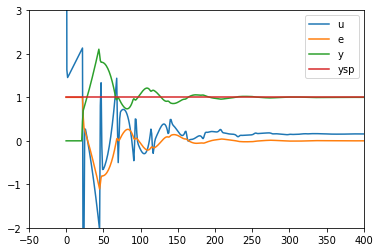

In [177]:
for signal, value in sim10.items():
    plt.plot(ts, value, label=signal)
plt.ylim(top=3)
plt.ylim(bottom=-2)
plt.xlim(right=400)
plt.legend()

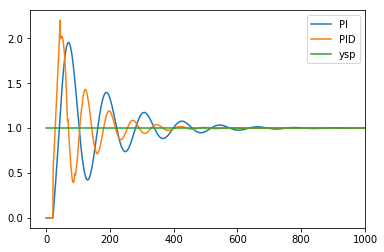

In [178]:
plt.plot(ts, y7, label='PI')
plt.plot(ts, y8, label='PID')
plt.plot(ts, ysp, label='ysp')
plt.xlim(right=1000)
plt.legend()